In [10]:
import os
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [11]:
data_dir = "/labs/mignot/TCR_PIPELINE/Liblau_Data_2019/rclFile"

In [12]:
def get_usage_ratio_df_from_fname(fname):
    df = pd.read_csv(os.path.join(data_dir, fname), delimiter="\t")
    v_counts = Counter(df['v_call'])
    j_counts = Counter(df['j_call'])
    v_counts.update(j_counts)
    counts_dict = dict(v_counts)
    tcrs = list(counts_dict.keys())
    counts = [counts_dict[key] for key in tcrs]
    df = pd.DataFrame.from_dict({"transcript": tcrs, "count": counts}).dropna()
    transcript_family_subtype_df = df["transcript"].str.split("*", n = 1, expand = True).rename(columns={0:"family", 1:"subtype"})
    df = df.copy()
    df.loc[:,'count'] = df['count'].astype(int)
    df.loc[:,"family"] = transcript_family_subtype_df["family"]
    df.loc[:,"subtype"] = transcript_family_subtype_df["subtype"]
    family_count_df = df.groupby(["family"]).sum().rename(columns={"count":"family_count"}).reset_index()
    family_count_df['segment'] = family_count_df['family'].str.slice(start=2, stop=4)
    if TRAB == "TRA":
        family_count_df = family_count_df[(family_count_df['segment'] == "AJ") | (family_count_df['segment'] == "AV")]
    elif TRAB == "TRB":
        family_count_df = family_count_df[(family_count_df['segment'] == "BJ") | (family_count_df['segment'] == "BV")]
    segment_count_df = family_count_df.groupby(["segment"]).sum().rename(columns={"family_count":"segment_count"}).reset_index()
    df_with_total = pd.merge(family_count_df, segment_count_df, how="inner", on=["segment"])
    df_with_total["usage_ratio"] = df_with_total["family_count"]/df_with_total["segment_count"]
    df_with_total = df_with_total.copy()
    df_with_total['patid'] = patid
    df_with_total['tcell_type'] = CD48
    all_ratios_df = df_with_total[["patid", "tcell_type", "family", "usage_ratio"]]
    return all_ratios_df

In [13]:
csvfile = open("liblau_fname_sampleID_mapping.csv", "w")

fname_df_dict = dict()
for fname in os.listdir(data_dir):
    if fname.startswith("TR"):
        print(fname)
        tokens = fname.split(".")
        TRAB, CD48 = tokens[0].split("_")
        patid = tokens[1]
        csvfile.write("{},{},{}\n".format(patid, CD48, fname))
        df = get_usage_ratio_df_from_fname(fname)
        fname_df_dict[fname] = df

TRB_CD4.8.10_TRB.rcl
TRA_CD4.6.10_TRA.rcl
TRB_CD8.6.11_TRB.rcl
TRB_CD4.18.10_TRB.rcl
TRA_CD4.12.10_TRA.rcl
TRB_CD8.7.11_TRB.rcl


/home/ashteng/36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


TRA_CD4.18.10_TRA.rcl
TRB_CD8.8.11_TRB.rcl
TRA_CD8.8.11_TRA.rcl
TRB_CD4.27.10_TRB.rcl
TRB_CD8.9.11_TRB.rcl
TRB_CD8.2.11_TRB.rcl
TRB_CD8.15.11_TRB.rcl
TRA_CD4.4.10_TRA.rcl
TRB_CD4.13.10_TRB.rcl
TRB_CD4.16.10_TRB.rcl
TRA_CD4.20.10_TRA.rcl
TRB_CD4.29.10_TRB.rcl
TRA_CD8.10.11_TRA.rcl
TRA_CD4.17.10_TRA.rcl
TRB_CD4.14.10_TRB.rcl
TRA_CD8.7.11_TRA.rcl
TRB_CD4.4.10_TRB.rcl
TRB_CD8.19.11_TRB.rcl
TRB_CD8.18.11_TRB.rcl
TRA_CD8.1.11_TRA.rcl
TRA_CD8.20.11_TRA.rcl
TRB_CD4.11.10_TRB.rcl
TRB_CD8.27.11_TRB.rcl
TRA_CD8.6.11_TRA.rcl
TRA_CD4.1.10_TRA.rcl
TRA_CD4.8.10_TRA.rcl
TRB_CD8.17.11_TRB.rcl
TRB_CD8.11.11_TRB.rcl
TRB_CD4.7.10_TRB.rcl
TRB_CD4.17.10_TRB.rcl
TRB_CD8.26.11_TRB.rcl
TRA_CD8.11.11_TRA.rcl
TRB_CD4.5.10_TRB.rcl
TRA_CD4.28.10_TRA.rcl
TRB_CD4.19.10_TRB.rcl
TRB_CD8.12.11_TRB.rcl
TRA_CD4.5.10_TRA.rcl


/home/ashteng/36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (8,24,25,26,27,52,86) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


TRA_CD4.3.10_TRA.rcl
TRB_CD4.12.10_TRB.rcl
TRA_CD8.3.11_TRA.rcl
TRA_CD4.15.10_TRA.rcl
TRB_CD8.28.11_TRB.rcl
TRB_CD8.20.11_TRB.rcl
TRA_CD4.26.10_TRA.rcl
TRA_CD4.14.10_TRA.rcl
TRB_CD4.6.10_TRB.rcl
TRA_CD8.28.11_TRA.rcl
TRA_CD8.9.11_TRA.rcl
TRA_CD8.4.11_TRA.rcl
TRA_CD4.13.10_TRA.rcl
TRA_CD4.16.10_TRA.rcl
TRA_CD8.13.11_TRA.rcl
TRB_CD4.20.10_TRB.rcl
TRB_CD8.10.11_TRB.rcl
TRB_CD8.16.11_TRB.rcl
TRB_CD4.26.10_TRB.rcl
TRB_CD4.28.10_TRB.rcl
TRA_CD4.11.10_TRA.rcl
TRA_CD8.19.11_TRA.rcl
TRA_CD8.29.11_TRA.rcl
TRB_CD8.5.11_TRB.rcl
TRB_CD4.9.10_TRB.rcl
TRB_CD4.1.10_TRB.rcl
TRA_CD8.17.11_TRA.rcl
TRA_CD4.2.10_TRA.rcl
TRB_CD8.13.11_TRB.rcl
TRB_CD8.1.11_TRB.rcl
TRA_CD8.15.11_TRA.rcl
TRB_CD4.3.10_TRB.rcl
TRB_CD8.29.11_TRB.rcl
TRA_CD4.19.10_TRA.rcl
TRA_CD8.18.11_TRA.rcl
TRA_CD4.7.10_TRA.rcl


/home/ashteng/36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


TRA_CD8.12.11_TRA.rcl
TRA_CD4.9.10_TRA.rcl
TRA_CD4.29.10_TRA.rcl
TRA_CD8.16.11_TRA.rcl
TRB_CD4.15.10_TRB.rcl


/home/ashteng/36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


TRA_CD8.5.11_TRA.rcl
TRA_CD8.26.11_TRA.rcl
TRA_CD8.2.11_TRA.rcl
TRB_CD8.14.11_TRB.rcl
TRA_CD8.14.11_TRA.rcl
TRA_CD4.10.10_TRA.rcl
TRB_CD4.2.10_TRB.rcl
TRA_CD4.27.10_TRA.rcl
TRA_CD8.27.11_TRA.rcl
TRB_CD4.10.10_TRB.rcl


In [8]:
#df = pd.read_csv("liblau_fname_sampleID_mapping.csv", header=None)
#df.sort_values(0).to_csv("liblau_fname_sampleID_mapping.csv", header=None, index=None)

In [ ]:
all_patid_dfs = pd.concat(fname_df_dict.values())

In [ ]:
i = 0
for fname in fname_df_dict:
    df = fname_df_dict[fname]
    i += len(df)

In [6]:
all_patid_dfs.to_csv("liblau_usage_ratios_long.csv", index=None)

NameError: name 'all_patid_dfs' is not defined

In [7]:
cd4_df = all_patid_dfs[all_patid_dfs['tcell_type'] == "CD4"]
cd4_df = cd4_df.pivot(index="patid", columns="family", values="usage_ratio")
cd4_df.to_csv("liblau_usage_ratios_cd4_wide.csv", index=None)

NameError: name 'all_patid_dfs' is not defined

In [35]:
cd8_df = all_patid_dfs[all_patid_dfs['tcell_type'] == "CD8"]
cd8_df = cd8_df.pivot(index="patid", columns="family", values="usage_ratio")
cd8_df.to_csv("liblau_usage_ratios_cd8_wide.csv", index=None)

In [51]:
cd4_mean = cd4_df.mean().to_frame("cd4_mean")
cd8_mean = cd8_df.mean().to_frame("cd8_mean")
merged_df = pd.merge(cd4_mean, cd8_mean, left_index=True, right_index=True, how="inner").fillna(0.0) # merge on TCR
merged_df = merged_df.reset_index()
merged_df['segment'] = merged_df['family'].str.slice(start=0, stop=4)

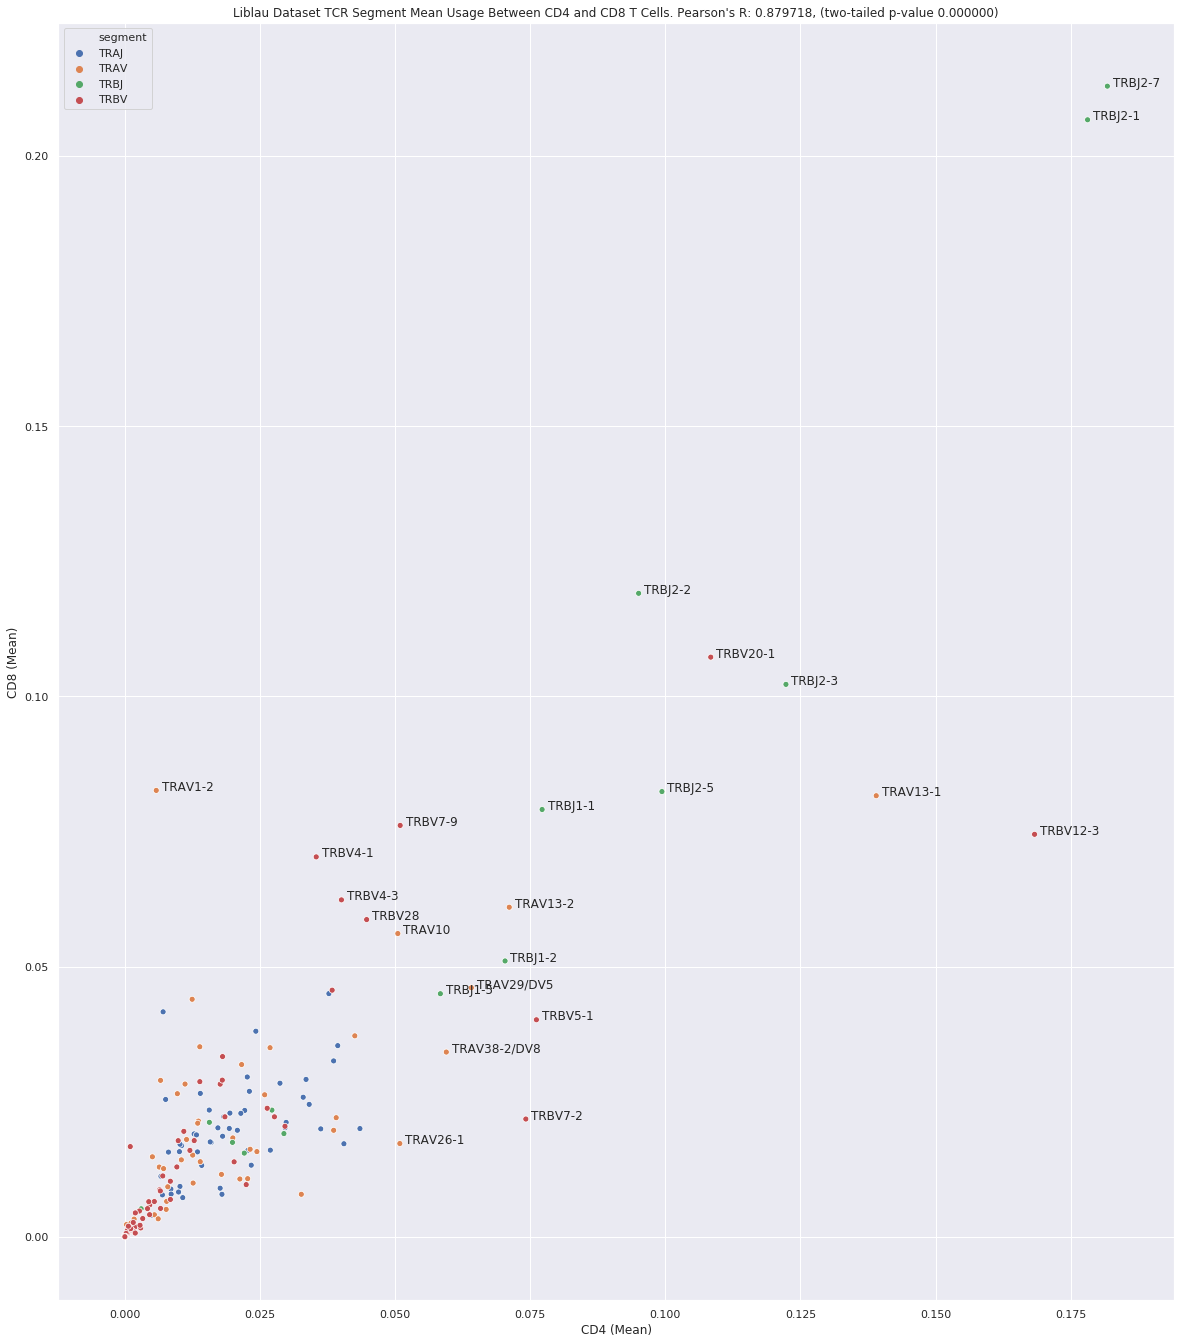

In [59]:
#segment = "TRAV" # change this flag for different plots
plot_df = merged_df
#plot_df = merged_df[merged_df['segment']==segment]
r, p = scipy.stats.pearsonr(plot_df['cd4_mean'], plot_df['cd8_mean'])

sns.set()
fig, ax = plt.subplots(figsize=(20,60))
sns.scatterplot(x="cd4_mean", y="cd8_mean", hue="segment", data=plot_df)
#plt.xlim(-0.01, 0.16)
#plt.ylim(-0.01, 0.16)
ax.set_aspect('equal', 'box')
plt.xlabel("CD4 (Mean)")
plt.ylabel("CD8 (Mean)")
plt.title("Liblau Dataset TCR Segment Mean Usage Between CD4 and CD8 T Cells. Pearson's R: {:4f}, (two-tailed p-value {:4f})".format(r, p))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['x']>0.05 or point['y']>0.05:
        #if str(point['val']) in ['TRAV23/DV6', 'TRAV13-1', 'TRAV10-1', 'TRAV17']:
            ax.text(point['x']+.001, point['y'], str(point['val']))

label_point(plot_df['cd4_mean'], plot_df['cd8_mean'], plot_df['family'], plt.gca())

In [37]:
all_patid_dfs

,patid,tcell_type,family,usage_ratio
0,8,CD4,TRBJ1-1,0.112429
1,8,CD4,TRBJ1-2,0.111419
2,8,CD4,TRBJ1-3,0.023678
3,8,CD4,TRBJ1-4,0.024338
4,8,CD4,TRBJ1-5,0.059551
...,...,...,...,...
85,10,CD4,TRBV9,0.014266
86,10,CD4,TRBVA,0.000018
87,10,CD4,TRBVA/OR9-2,0.000020
88,10,CD4,TRBVB,0.000033


(0, 0.5)

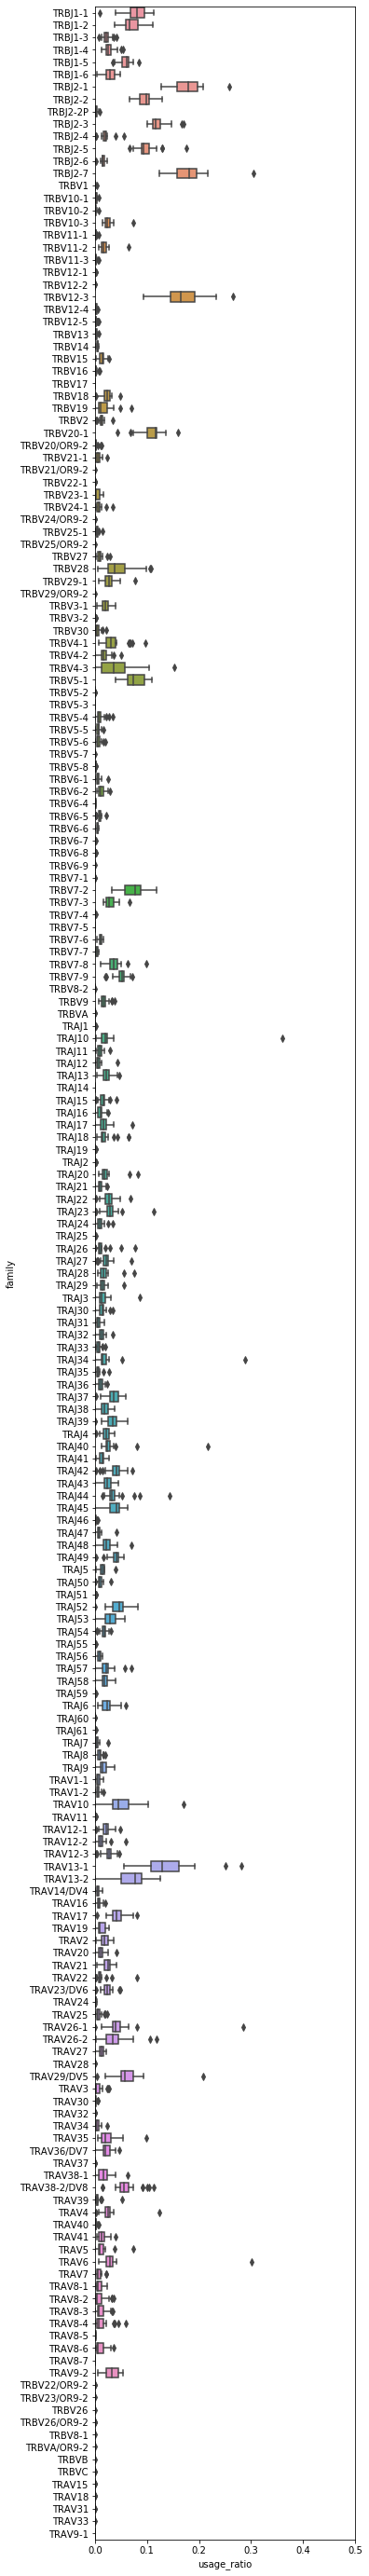

In [42]:
# plotting gene expression

f, ax = plt.subplots(figsize=(5,50))
sns.boxplot(y="family", x="usage_ratio", data=all_patid_dfs[all_patid_dfs['tcell_type'] == "CD4"])
plt.xlim((0,0.5))
#plt.title("Non Protein Coding OR Non Functional Genes")